In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy import stats
from skimage import io
from skimage.filters import threshold_otsu

plt.ioff()

In [62]:
source_file = '/home/ula/Downloads/edyta/stats.csv'
result_file = '/home/ula/Downloads/edyta/otsu_thre.csv'

means = np.array([])
stdev = np.array([])
with open(source_file,"r") as source:
    rdr = csv.DictReader( source )
    hist_edyta = np.array([])
    for row in rdr:
        means = np.append(means, row['mean'])
        stdev = np.append(stdev, row['stdev'])
        
means = means.astype(np.float)
stdev = stdev.astype(np.float)

In [180]:
threshold_global_otsu = threshold_otsu(means)
print(threshold_global_otsu)
with open(result_file,"w") as result:
    wtr = csv.writer( result )
    wtr.writerow( [threshold_global_otsu] )

127.1673828125


In [154]:
def cumulative_sum(arr):
    ret = []
    sum_so_far = 0
    for el in arr:
        sum_so_far += el
        ret.append(sum_so_far)
    return ret

In [155]:
a = np.array([1, 5,3,7,9,2,5])

[x / 2 for x in aaa]



a_, b_ = np.histogram(means, bins=256)
print(len(a_), len(b_))

256 257


In [176]:
def histogram(arr):
    min_ = min(arr)
    max_ = max(arr)
    step = (max_-min_)/256
    bins_ = []
    hist = []
    bins_.append(min_)
    for i in range(256):
        bins_.append(min_+(i+1)*step)
        hist.append(0)
    
    bin_centers = listsum(bins_[:-1], bins_[1:])
    
    bin_centers[:] = [x / 2 for x in bin_centers]
    
    for el in arr:
        if el == max_:
            idx = -1
        else:
            idx = int((el-min_)//step)
        hist[idx] += 1
    return hist, bin_centers





In [210]:
def dot(arr1,arr2):
    arr = [i[0] * i[1] for i in zip(arr1, arr2)]
    return arr

def div(arr1,arr2):
    arr = [i[0] / i[1] for i in zip(arr1, arr2)]
    return arr

def subtract(arr1,arr2):
    arr = [i[0] - i[1] for i in zip(arr1, arr2)]
    return arr

def listsum(arr1,arr2):
    arr = [i[0] + i[1] for i in zip(arr1, arr2)]
    return arr

def power(arr, n):
    return [i**n for i in arr]

def argmax(arr):
    max_val = max(arr)
    for i, el in enumerate(arr):
        if el == max_val:
            return i
    return 0

In [211]:
def otsu_thre(hist, bin_centers):
    hist_ = np.array(hist)
    bin_centers_ = np.array(bin_centers)
    weight1_ = np.cumsum(hist_)
    weight2_ = np.cumsum(hist_[::-1])[::-1]
    # class means for all possible thresholds
    mean1_ = np.cumsum(hist_ * bin_centers_) / weight1_
    mean2_ = (np.cumsum((hist_ * bin_centers_)[::-1]) / weight2_[::-1])[::-1]

    # Clip ends to align class 1 and class 2 variables:
    # The last value of ``weight1``/``mean1`` should pair with zero values in
    # ``weight2``/``mean2``, which do not exist.
    variance12_ = weight1_[:-1] * weight2_[1:] * (mean1_[:-1] - mean2_[1:]) ** 2

    idx_ = np.argmax(variance12_)
    threshold_ = bin_centers[:-1][idx_]
    
    
    weight1 = cumulative_sum(hist)
    weight2 = cumulative_sum(hist[::-1])[::-1]
    # class means for all possible thresholds
    mean1 = div(cumulative_sum(dot(hist, bin_centers)), weight1)
    mean2 = (div(cumulative_sum(dot(hist, bin_centers)[::-1]), weight2[::-1]))[::-1]

    variance12 = dot(dot(weight1[:-1], weight2[1:]), power(subtract(mean1[:-1], mean2[1:]), 2))

    idx = argmax(variance12)
    threshold = bin_centers[:-1][idx]
    
    print(threshold_)
    return threshold


In [214]:
hist, bins = histogram(means)
otsu_thre(hist, bins)

127.1673828125


127.1673828125

In [188]:
a = np.array([1,3,4])
b = np.array([4,3,1])
a*b

array([4, 9, 4])

<IPython.core.display.Javascript object>


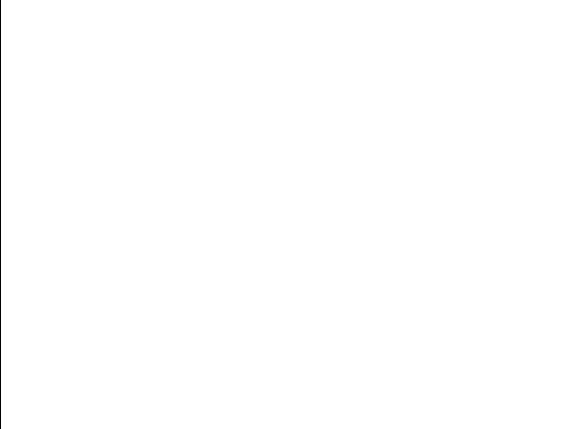

<IPython.core.display.Javascript object>


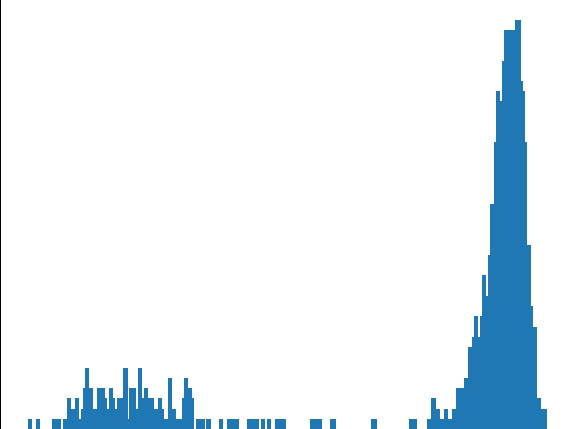

In [99]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(bins,hist)
plt.show()

<IPython.core.display.Javascript object>


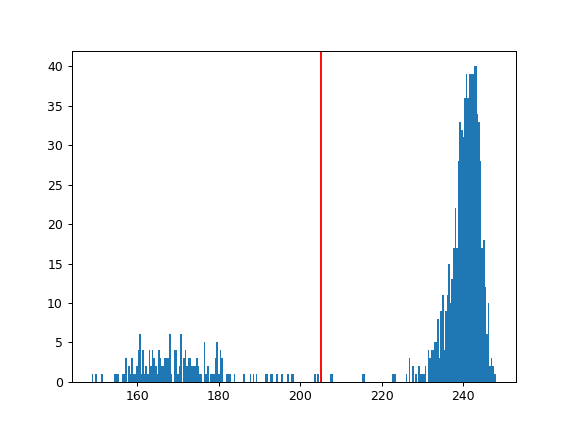

In [101]:
threshold_global_otsu = threshold_otsu(stdev)
plt.axvline(threshold_global_otsu, color='red')
plt.hist(stdev,256)
plt.show()

In [ ]:
stdev_filtered = stdev[stdev>threshold_global_otsu]
plt.hist(stdev_filtered,50)
plt.show()

In [ ]:
plt.scatter(means[stdev>threshold_global_otsu], stdev[stdev>threshold_global_otsu], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('mean')
plt.ylabel('stdev')
plt.show()